## 5. K-NN(K-Nearest Neighbor)

### 5.1 K-NN 알고리즘의 원리
+ K-NN 알고리즘에서는 새로운 데이터의 클래스를 할당 데이터와 가장 가까운 k개 데이터들의 클래스(범주)로 결정한다.
+ K-NN 알고리즘에서는 최근접 이웃 간의 거리를 계산할 때 유클리디안 거리, 맨하탄 거리, 민코우스키 거리 동을 사용할 수 있으며, 대표적으로 유클리디안 거리를 사용한다.
+ 정규화를 해주어야 한다.

### 5.2 K의 선택
+ K의 선택은 학습의 난이도와 데이터의 개수에 따라 결정될 수 있으며, 일반적으로는 훈련 데이터 개수의 제곱근으로 설정한다. 그리고 짝수로 했을 때, 인접객체의 범주가 동률일 경우가 나오므로 일반적으로 홀수로 설정한다.

#### 5.2.1 실습
credit 데이터의 train 데이터로 K-NN 모델을 만들어 보자.

      pred-T[0]  pred-F[1]
T[0]         30         60
F[1]         26        184
Accuracy : 0.7133333333333334
f1 score : 0.8105726872246696
precision score : 0.7540983606557377
recall score : 0.8761904761904762
roc_auc score : 0.7094973544973545


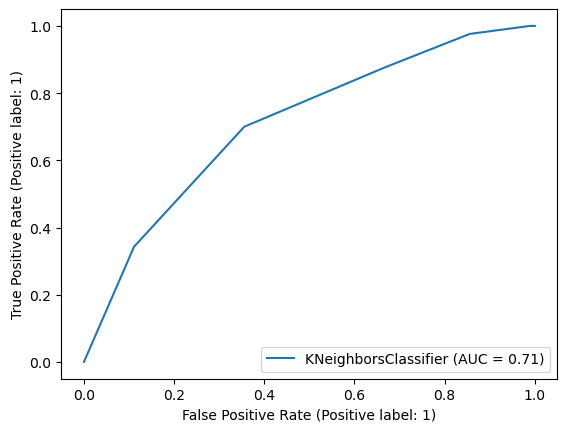

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')

X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, RocCurveDisplay
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, test_size = 0.3, random_state = 42)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

# 오차행렬
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[1]'], columns= ['pred-T[0]', 'pred-F[1]']))

# 평가지표
print('Accuracy :', knn_clf.score(X_test, y_test))
print('f1 score :', f1_score(y_test, y_pred))
print('precision score :', precision_score(y_test, y_pred))
print('recall score :', recall_score(y_test, y_pred))
print('roc_auc score :', roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:,1]))

# ROC 곡선 시각화
RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)
plt.show()

In [6]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### 5.2.2 최적의 k 찾기

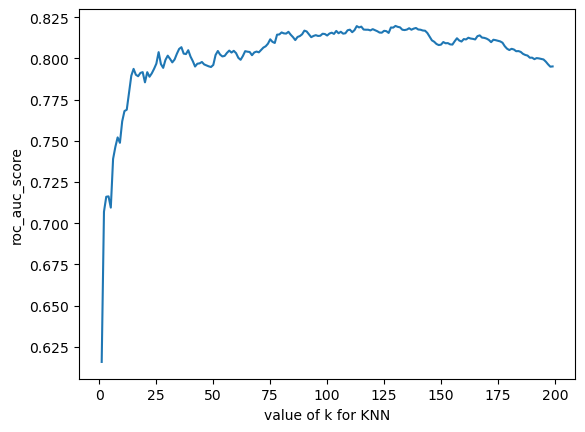

In [21]:
k_range = range(1, 200)
k_scores = []

for k in k_range :
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    scores = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
    k_scores.append(scores)

import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('roc_auc_score')
plt.show()

In [19]:
print(max(k_scores))
print(k_scores.index(max(k_scores)))

0.8197354497354497
129


[결과 해석]
+ roc_auc score 를 평가지표로 했을 때 k = 129 에서 좋은 지표를 가진다.

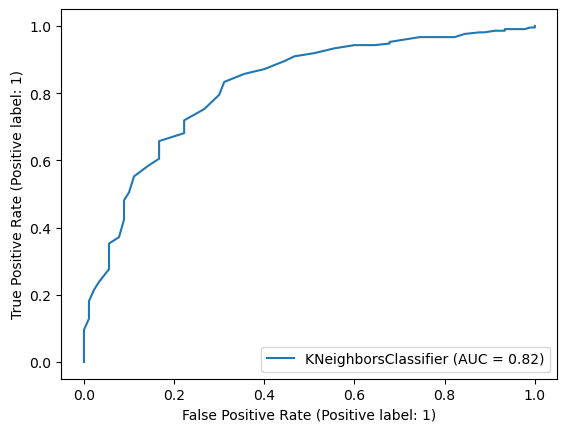

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=129)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)

### 5.2.3 GridsearchCV 를 이용한 최적의 K 찾기

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
import numpy as np

param_grid = {'n_neighbors' : np.arange(1, 200)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)

{'n_neighbors': 196}


0.7980952380952381

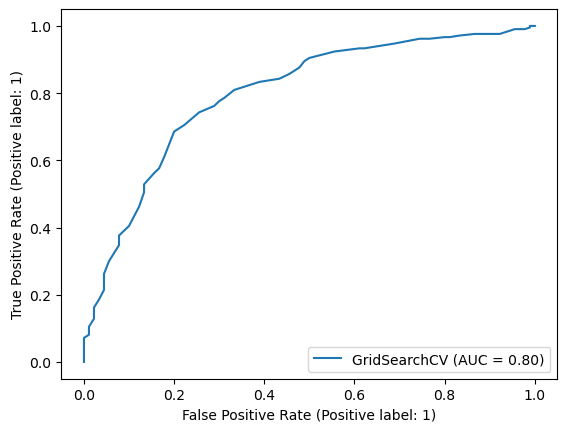

In [53]:
knn = KNeighborsClassifier(n_neighbors=196)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

RocCurveDisplay.from_estimator(grid_knn, X_test ,y_test)
roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

+ 이전보다는 좋은 모델이 되었지만 절대적으로 좋은 모델이라고는 할 수 없다.
+ KNN은 단순한 모델로 분류분석에서 사용하기 보다는 결착치 제거나, 업샘플링에 사용하는 알고리즘으로 많이 사용된다.